In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
market = pd.read_csv('marketing_campaign.csv') #loading csv

In [3]:
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# EDA

In [4]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
market['Dt_Customer'] = pd.to_datetime(market['Dt_Customer'])

In [6]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
customer_year = pd.DatetimeIndex(market['Dt_Customer']).year
from datetime import date                                        #Resolving Dt_customer columns on the basis of year. 
curr_date = date.today()
curr_date.year
market['Dt_Customer'] = curr_date.year - customer_year

In [8]:
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,7,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,7,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,7,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,8,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,7,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,7,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,7,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
market['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [10]:
market['Education'] = market['Education'].replace(['PhD','Master','2n Cycle'],'PostGraduation')
market['Education'] = market['Education'].replace(['Graduation','Basic'],'Undergrad')        #resolving education column

In [11]:
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Undergrad,Single,58138.0,0,0,9,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergrad,Single,46344.0,1,1,7,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergrad,Together,71613.0,0,0,8,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergrad,Together,26646.0,1,0,7,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PostGraduation,Married,58293.0,1,0,7,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergrad,Married,61223.0,0,1,8,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PostGraduation,Together,64014.0,2,1,7,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Undergrad,Divorced,56981.0,0,0,7,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,PostGraduation,Together,69245.0,0,1,7,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
market['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
market['Marital_Status'] = market['Marital_Status'].replace(['Together','Single','Divorced','Widow','Alone','Absurd','YOLO'],'UnMarried')

In [14]:
market

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Undergrad,UnMarried,58138.0,0,0,9,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergrad,UnMarried,46344.0,1,1,7,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergrad,UnMarried,71613.0,0,0,8,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergrad,UnMarried,26646.0,1,0,7,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PostGraduation,Married,58293.0,1,0,7,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergrad,Married,61223.0,0,1,8,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PostGraduation,UnMarried,64014.0,2,1,7,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Undergrad,UnMarried,56981.0,0,0,7,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,PostGraduation,UnMarried,69245.0,0,1,7,8,428,...,3,0,0,0,0,0,0,3,11,0


In [15]:
market['Income'].isnull().sum()  #24 null values

24

In [16]:
market['Income'].fillna(int(market['Income'].mean()),inplace=True)  #fill na values with mean of income values.

In [17]:
market['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [18]:
market['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [19]:
market.drop(columns=['Z_Revenue','Z_CostContact'],inplace=True)  #Dropping values as all entries were same.

In [20]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
market['Education'] = le.fit_transform(market['Education'])

In [24]:
market['Marital_Status']=le.fit_transform(market['Marital_Status'])

In [25]:
market['kids'] = market['Kidhome']+market['Teenhome']   #calculating total kids for a person.

In [26]:
market.drop(columns=['Kidhome','Teenhome'],inplace=True)

In [27]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Dt_Customer          2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [28]:
market.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,kids
0,5524,1957,1,1,58138.0,9,58,635,88,546,...,4,7,0,0,0,0,0,0,1,0
1,2174,1954,1,1,46344.0,7,38,11,1,6,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,1,1,71613.0,8,26,426,49,127,...,10,4,0,0,0,0,0,0,0,0
3,6182,1984,1,1,26646.0,7,26,11,4,20,...,4,6,0,0,0,0,0,0,0,1
4,5324,1981,0,0,58293.0,7,94,173,43,118,...,6,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,8,46,709,43,182,...,4,5,0,0,0,0,0,0,0,1
2236,4001,1946,0,1,64014.0,7,56,406,0,30,...,5,7,0,0,0,1,0,0,0,3
2237,7270,1981,1,1,56981.0,7,91,908,48,217,...,13,6,0,1,0,0,0,0,0,0
2238,8235,1956,0,1,69245.0,7,8,428,30,214,...,10,3,0,0,0,0,0,0,0,1


In [29]:
market['accepted_offer'] = market['AcceptedCmp1'] + market['AcceptedCmp2'] + market['AcceptedCmp3'] + market['AcceptedCmp4']+ market['AcceptedCmp5']+market['Response']

In [30]:
market['accepted_offer'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: accepted_offer, dtype: int64

In [31]:
market.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],inplace=True)

In [32]:
# by this we can check which customers are tempted by offers.

In [33]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Dt_Customer          2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [34]:
market['total_purchase_amt'] = market['MntWines'] + market['MntFruits'] + market['MntMeatProducts'] + market['MntFishProducts']+ market['MntSweetProducts']+market['MntGoldProds']

In [35]:
market.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],inplace=True)

In [36]:
market['total_purchase_amt']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_purchase_amt, Length: 2240, dtype: int64

In [37]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Dt_Customer          2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   NumDealsPurchases    2240 non-null   int64  
 8   NumWebPurchases      2240 non-null   int64  
 9   NumCatalogPurchases  2240 non-null   int64  
 10  NumStorePurchases    2240 non-null   int64  
 11  NumWebVisitsMonth    2240 non-null   int64  
 12  Complain             2240 non-null   int64  
 13  kids                 2240 non-null   int64  
 14  accepted_offer       2240 non-null   int64  
 15  total_purchase_amt   2240 non-null   i

# Data Visualization

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain', ylabel='count'>

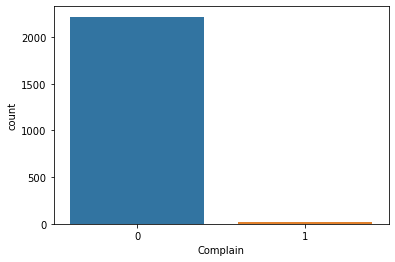

In [39]:
sns.countplot(market['Complain'])

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accepted_offer', ylabel='count'>

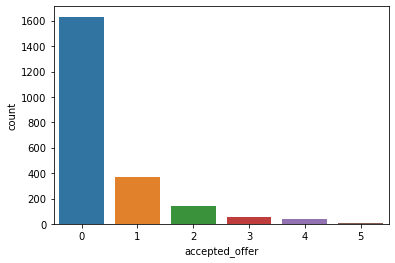

In [40]:
sns.countplot(market['accepted_offer'])  #majority of customers didn't accept offer during campaigning.

In [41]:
market

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,kids,accepted_offer,total_purchase_amt
0,5524,1957,1,1,58138.0,9,58,3,8,10,4,7,0,0,1,1617
1,2174,1954,1,1,46344.0,7,38,2,1,1,2,5,0,2,0,27
2,4141,1965,1,1,71613.0,8,26,1,8,2,10,4,0,0,0,776
3,6182,1984,1,1,26646.0,7,26,2,2,0,4,6,0,1,0,53
4,5324,1981,0,0,58293.0,7,94,5,5,3,6,5,0,1,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,8,46,2,9,3,4,5,0,1,0,1341
2236,4001,1946,0,1,64014.0,7,56,7,8,2,5,7,0,3,1,444
2237,7270,1981,1,1,56981.0,7,91,1,2,3,13,6,0,0,1,1241
2238,8235,1956,0,1,69245.0,7,8,2,6,5,10,3,0,1,0,843


In [42]:
relation = market[['Year_Birth','total_purchase_amt']].groupby('Year_Birth').aggregate(np.sum)

<AxesSubplot:xlabel='Year_Birth'>

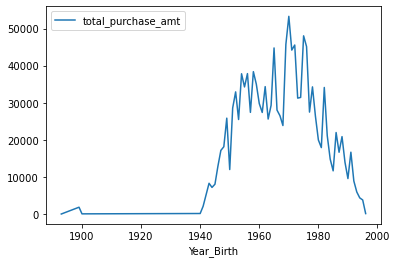

In [43]:
relation.plot() # finding that max_purchases are done from people with yaer birth 1970-1980.

In [44]:
market['total_purchases'] = market['NumDealsPurchases']+market['NumWebPurchases']+market['NumCatalogPurchases']+market['NumStorePurchases']

In [45]:
pur_relation =  market[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].groupby(market['total_purchases']).aggregate(np.sum)

<AxesSubplot:xlabel='total_purchases'>

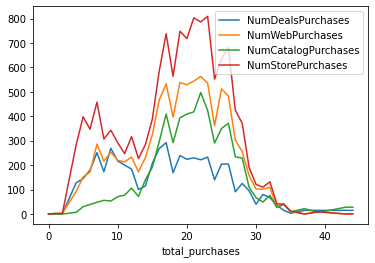

In [46]:
pur_relation.plot()  #we can see the store purchases is the preferred mode of purchasing item.

In [47]:
market.drop(columns=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'],inplace=True)

In [48]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2240 non-null   int64  
 1   Year_Birth          2240 non-null   int64  
 2   Education           2240 non-null   int64  
 3   Marital_Status      2240 non-null   int64  
 4   Income              2240 non-null   float64
 5   Dt_Customer         2240 non-null   int64  
 6   Recency             2240 non-null   int64  
 7   NumWebVisitsMonth   2240 non-null   int64  
 8   Complain            2240 non-null   int64  
 9   kids                2240 non-null   int64  
 10  accepted_offer      2240 non-null   int64  
 11  total_purchase_amt  2240 non-null   int64  
 12  total_purchases     2240 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 227.6 KB


In [90]:
grouped = market['NumWebVisitsMonth'].groupby(market['Year_Birth']).aggregate(np.mean)

<AxesSubplot:xlabel='Year_Birth'>

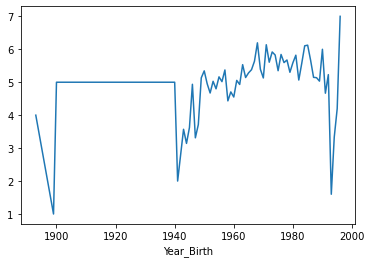

In [91]:
grouped.plot() #By this we can analyze the trend among certain age groups which majorly do web visits.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9278e5aac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9278e681c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9278e5a760>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9278e68880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9278e68be0>],
 'means': []}

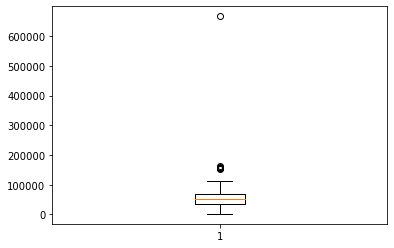

In [51]:
plt.boxplot(market['Income'])

In [52]:
print('Highest Allowed Income',market['Income'].mean() + 3*market['Income'].std())

Highest Allowed Income 127360.64016593146


In [53]:
df_filtered = market[market['Income']<127360]

In [54]:
df_filtered

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,kids,accepted_offer,total_purchase_amt,total_purchases
0,5524,1957,1,1,58138.0,9,58,7,0,0,1,1617,25
1,2174,1954,1,1,46344.0,7,38,5,0,2,0,27,6
2,4141,1965,1,1,71613.0,8,26,4,0,0,0,776,21
3,6182,1984,1,1,26646.0,7,26,6,0,1,0,53,8
4,5324,1981,0,0,58293.0,7,94,5,0,1,0,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,8,46,5,0,1,0,1341,18
2236,4001,1946,0,1,64014.0,7,56,7,0,3,1,444,22
2237,7270,1981,1,1,56981.0,7,91,6,0,0,1,1241,19
2238,8235,1956,0,1,69245.0,7,8,3,0,1,0,843,23


In [55]:
df_filtered['Income'].describe()

count      2232.000000
mean      51640.233423
std       20601.760289
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9298533d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9298540490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9298533a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9298540b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9298540eb0>],
 'means': []}

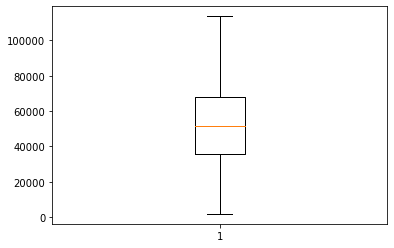

In [56]:
plt.boxplot(df_filtered['Income'])  #Removed outliers and replaced the outlier value with max value of income column.

In [57]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2232 non-null   int64  
 1   Year_Birth          2232 non-null   int64  
 2   Education           2232 non-null   int64  
 3   Marital_Status      2232 non-null   int64  
 4   Income              2232 non-null   float64
 5   Dt_Customer         2232 non-null   int64  
 6   Recency             2232 non-null   int64  
 7   NumWebVisitsMonth   2232 non-null   int64  
 8   Complain            2232 non-null   int64  
 9   kids                2232 non-null   int64  
 10  accepted_offer      2232 non-null   int64  
 11  total_purchase_amt  2232 non-null   int64  
 12  total_purchases     2232 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 244.1 KB


In [58]:
train = df_filtered.drop(columns=['ID'])

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2232 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Birth          2232 non-null   int64  
 1   Education           2232 non-null   int64  
 2   Marital_Status      2232 non-null   int64  
 3   Income              2232 non-null   float64
 4   Dt_Customer         2232 non-null   int64  
 5   Recency             2232 non-null   int64  
 6   NumWebVisitsMonth   2232 non-null   int64  
 7   Complain            2232 non-null   int64  
 8   kids                2232 non-null   int64  
 9   accepted_offer      2232 non-null   int64  
 10  total_purchase_amt  2232 non-null   int64  
 11  total_purchases     2232 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 226.7 KB


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
ss = StandardScaler()

In [62]:
transformed_data = ss.fit_transform(train)

In [63]:
transformed_data

array([[-0.9837257 ,  0.9459053 ,  0.79247003, ...,  0.61862147,
         1.68200203,  1.33048208],
       [-1.23398319,  0.9459053 ,  0.79247003, ..., -0.50303826,
        -0.96222727, -1.16258455],
       [-0.3163724 ,  0.9459053 ,  0.79247003, ..., -0.50303826,
         0.28338766,  0.80562595],
       ...,
       [ 1.01833419,  0.9459053 ,  0.79247003, ...,  0.61862147,
         1.05670001,  0.54319788],
       [-1.06714486, -1.05718828,  0.79247003, ..., -0.50303826,
         0.39481116,  1.06805401],
       [-1.23398319, -1.05718828, -1.26187737, ...,  0.61862147,
        -0.72108686, -0.50651439]])

In [64]:
inertia_scores = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(transformed_data)
    inertia_scores.append(km.inertia_)

In [65]:
inertia_scores

[26783.99999999998,
 20974.389425844765,
 19433.13016841274,
 18298.002828466317,
 16185.916330227768,
 15129.213434919193,
 14417.75810060162,
 13863.959596049732,
 13421.489565430935,
 13044.53165124397,
 12655.850006560966,
 12392.359137834224,
 12040.16343979063,
 11819.258056548184]

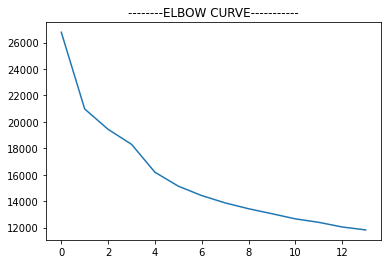

In [66]:
plt.title('--------ELBOW CURVE-----------')
plt.plot(inertia_scores)

In [136]:
model = KMeans(n_clusters=3,random_state=1)

In [137]:
model = model.fit_predict(transformed_data)

In [138]:
Cluster = pd.DataFrame(model,columns=['cluster'])

In [139]:
Cluster.value_counts()

cluster
1          1022
2           711
0           499
dtype: int64

In [140]:
Cluster.astype('int')

,cluster
0,2
1,1
2,2
3,1
4,2
...,...
2227,2
2228,2
2229,0
2230,2


In [141]:
df_final = pd.DataFrame(np.hstack([df_filtered,Cluster]))

In [142]:
df_filtered

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,kids,accepted_offer,total_purchase_amt,total_purchases
0,5524,1957,1,1,58138.0,9,58,7,0,0,1,1617,25
1,2174,1954,1,1,46344.0,7,38,5,0,2,0,27,6
2,4141,1965,1,1,71613.0,8,26,4,0,0,0,776,21
3,6182,1984,1,1,26646.0,7,26,6,0,1,0,53,8
4,5324,1981,0,0,58293.0,7,94,5,0,1,0,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,0,61223.0,8,46,5,0,1,0,1341,18
2236,4001,1946,0,1,64014.0,7,56,7,0,3,1,444,22
2237,7270,1981,1,1,56981.0,7,91,6,0,0,1,1241,19
2238,8235,1956,0,1,69245.0,7,8,3,0,1,0,843,23


In [143]:
df_final.columns = ['ID','Year_Birth','Education','Marital_Status','Income','Dt_Customer','Recency','NumWebVisitsMonth','Complain','kids','accepted_offer','total_purchase_amt','total_purchases','cluster']                         

In [144]:
df_final['Education'] = df_final['Education'].astype('int')
df_final['Marital_Status'] = df_final['Marital_Status'].astype('int')
df_final['Dt_Customer'] = df_final['Dt_Customer'].astype('int')
df_final['Recency'] = df_final['Recency'].astype('int')
df_final['NumWebVisitsMonth'] = df_final['NumWebVisitsMonth'].astype('int')
df_final['Complain'] = df_final['Complain'].astype('int')
df_final['kids'] = df_final['kids'].astype('int')
df_final['accepted_offer'] = df_final['accepted_offer'].astype('int')
df_final['total_purchases'] = df_final['total_purchases'].astype('int')
df_final['cluster'] = df_final['cluster'].astype('int')

/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_purchase_amt', ylabel='Income'>

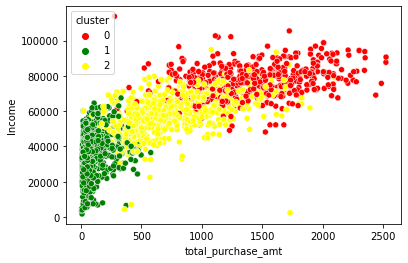

In [146]:
sns.scatterplot(df_final['total_purchase_amt'],df_final['Income'],hue=df_final['cluster'],palette=['red','green','yellow'])

In [147]:
cluster_1 = df_final[df_final['cluster']==1]

In [148]:
cluster_2 = df_final[df_final['cluster']==2]   

In [149]:
cluster_0 = df_final[df_final['cluster']==0]

In [158]:
cluster_2['Income'].mean()

58947.75386779184

In [157]:
cluster_1['Income'].mean()

34060.11350293542

In [156]:
cluster_0['Income'].mean()

77233.89178356713

In [159]:
cluster_0

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,kids,accepted_offer,total_purchase_amt,total_purchases,cluster
12,2125.0,1959.0,1,1,63033.0,8,82,2,0,0,0,1102.0,16,0
15,2114.0,1946.0,0,1,82800.0,9,23,3,0,0,3,1315.0,26,0
18,6565.0,1949.0,0,0,76995.0,8,91,5,0,1,1,1782.0,26,0
29,1966.0,1965.0,0,0,84618.0,8,96,2,0,0,1,1672.0,26,0
45,1371.0,1976.0,1,1,79941.0,7,72,1,0,0,0,984.0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,3661.0,1995.0,0,1,80617.0,9,42,2,0,0,0,1435.0,19,0
2210,9589.0,1948.0,0,1,82032.0,7,54,1,0,0,0,1234.0,17,0
2214,7366.0,1982.0,0,1,75777.0,8,12,1,0,0,3,1438.0,21,0
2221,8720.0,1978.0,0,1,52247.0,9,53,0,0,0,1,1679.0,1,0


/Users/shuhulnehru/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='total_purchase_amt'>

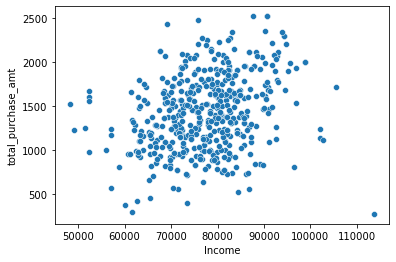

In [160]:
sns.scatterplot('Income','total_purchase_amt',data=cluster_0)

In [166]:
cluster_0['Complain'].value_counts()

0    497
1      2
Name: Complain, dtype: int64

In [167]:
cluster_1['Complain'].value_counts()

0    1010
1      12
Name: Complain, dtype: int64

In [169]:
cluster_2['Complain'].value_counts()

0    704
1      7
Name: Complain, dtype: int64